General imports made to make the code function

In [86]:
#test

In [87]:
# Used imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


# **Preparing dataframes**
Prepare every data category induvidually

Reading all the csv's into dataframes

In [88]:
df_deelnemeners = pd.read_csv('Data - Zuivere dataset/HealthyLIFE_datadump_03-2023_1.csv', sep=';')
df_fitheids_scan = pd.read_csv('Data - Zuivere dataset/HealthyLIFE_datadump_03-2023_2.csv', sep=';')
df_cbs_afstanden = pd.read_csv('Data - Zuivere dataset/Nabijheid_voorzieningen__regio_17052023_115259.csv', sep=';')
df_kvk_inkomen = pd.read_csv('Data - Zuivere dataset/kvk2019-wb2022-inkomen-1.csv', sep=';')
df_afkomst_per_gemeente = pd.read_csv('Data - Zuivere dataset/Afkomst_Per_Gemeente.csv',sep=";" )
df_uitkeringen = pd.read_csv('Data - Zuivere dataset/Uitkeringen.csv', sep=';')
df_welzijn = pd.read_csv('Data - Zuivere dataset/table_tabel-34911035-1268-41a0-961d-229504cfd3f2.csv')
df_gezondheid = pd.read_csv('Data - Zuivere dataset/Gezondheidsmonitor__bevolking_18_jaar_of_ouder__regio__2020_17052023_132409.csv', sep=';')

**Verwijderen onbruikbare data**

Bewerken van de df_deelnemers dataset uit de aangeleverde set data van Roel

In [89]:
df_deelnemeners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426 entries, 0 to 2425
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               2426 non-null   int64 
 1   Geslacht         2426 non-null   object
 2   Woonplaats       2426 non-null   object
 3   Postcode         1702 non-null   object
 4   Beweegcoach1     1609 non-null   object
 5   Leefstijlcoach1  2214 non-null   object
 6   age              2426 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 132.8+ KB


In [90]:
# Rename columns
df_deelnemeners.rename(columns={'Id': 'DeelnemerID'}, inplace=True)

# Adding columns
df_deelnemeners['Gemeente'] = df_deelnemeners['Woonplaats']

# Replace values
df_deelnemeners['Gemeente'] = df_deelnemeners['Gemeente'].replace(['Born', 'Geleen', 'Sittard'], 'Sittard-Geleen')
df_deelnemeners['Gemeente'] = df_deelnemeners['Gemeente'].replace(['Schinnen'], 'Beekdaelen')

# Dropping row with specific testing value
df_deelnemeners.drop(df_deelnemeners[df_deelnemeners['Gemeente'] == 'Test'].index, inplace = True)

# Dropping columns
df_deelnemeners.drop(columns=['Woonplaats', 'Postcode'], inplace = True)

# Dit is een beetje experimenteel maar hier drop ik gewoon waardeloze data die we niet nodig hebben -groetjes Justin XOXOXO
df_deelnemeners.drop(columns={'Beweegcoach1', 'Leefstijlcoach1'}, inplace= True)
# Ook doe ik even hier de deelnemerID naar int omzetten omdat er geen halve deelnemen kan zijn... denk ik
df_deelnemeners['DeelnemerID'] = df_deelnemeners['DeelnemerID'].astype(int)

# Display the modified DataFrame
df_deelnemeners

,DeelnemerID,Geslacht,age,Gemeente
0,1,V,51,Sittard-Geleen
1,2,V,45,Sittard-Geleen
2,3,V,68,Sittard-Geleen
3,4,M,64,Sittard-Geleen
4,5,V,63,Sittard-Geleen
...,...,...,...,...
2421,2661,V,47,Beekdaelen
2422,2662,V,29,Sittard-Geleen
2423,2663,V,66,Maasgouw
2424,2664,M,52,Maasgouw


Bewerken van de df_fitheids_scan dataset

In [91]:
df_fitheids_scan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DeelnemerID  3193 non-null   float64
 1   Datum        3197 non-null   object 
 2   Lengte       3195 non-null   object 
 3   Gewicht      3178 non-null   object 
 4   6 MWT        3120 non-null   object 
 5   TUG          3130 non-null   object 
 6   BMI          3196 non-null   object 
 7   Conditie     3197 non-null   object 
 8   Lenigheid    3006 non-null   object 
 9   Knijpkracht  3197 non-null   object 
 10  #meting      3197 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 274.9+ KB


In [92]:
# Convert 'DeelnemerID' column to int
df_fitheids_scan['DeelnemerID'] = df_fitheids_scan['DeelnemerID'].astype(pd.Int64Dtype())

# Replace commas with periods and convert columns to float
columns_to_convert = ['Lengte', 'Gewicht', '6 MWT', 'TUG', 'BMI', 'Conditie', 'Lenigheid', 'Knijpkracht']
df_fitheids_scan[columns_to_convert] = df_fitheids_scan[
    columns_to_convert].astype(str).apply(lambda x: x.str.replace(',', '.')).astype(float)

df_fitheids_scan['Datum'] = pd.to_datetime(df_fitheids_scan['Datum'])

# Display the modified DataFrame
df_fitheids_scan

C:\Users\maxgo\AppData\Local\Temp\ipykernel_29108\2775220850.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fitheids_scan['Datum'] = pd.to_datetime(df_fitheids_scan['Datum'])


,DeelnemerID,Datum,Lengte,Gewicht,6 MWT,TUG,BMI,Conditie,Lenigheid,Knijpkracht,#meting
0,1,2018-03-30,159.0,97.6,500.0,6.36,38.606068,0.820291,31.50,15.0,1
1,1,2018-06-18,159.0,95.3,448.0,9.30,37.700000,0.695091,0.00,45.8,2
2,2,2018-03-30,175.0,89.1,596.0,5.82,29.093878,0.806495,27.00,34.0,1
3,2,2019-01-25,170.0,86.0,556.0,5.50,29.757785,0.779192,29.25,29.0,3
4,3,2018-07-02,151.5,94.8,512.0,6.84,41.303140,1.054387,19.00,20.3,2
...,...,...,...,...,...,...,...,...,...,...,...
3192,2409,2023-03-07,182.0,130.0,543.5,6.00,39.246468,0.834113,NaN,45.6,1
3193,2341,2023-03-07,184.5,139.2,558.0,6.20,40.892767,0.766821,14.50,84.7,2
3194,2340,2023-03-07,158.6,107.4,486.0,7.00,42.697054,0.788393,486.00,33.7,2
3195,2337,2023-03-07,175.5,111.0,557.0,6.40,36.038669,0.820348,25.50,68.2,2


Bewerken van de df_cbs_afstanden dataset

In [93]:
df_cbs_afstanden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Columns: 127 entries, Regio's to Afstand tot brandweerkazerne (km)
dtypes: float64(92), int64(1), object(34)
memory usage: 1.9+ MB


In [94]:
# rename columns for merging
df_cbs_afstanden.rename(columns={"Regio's": 'Gemeente'}, inplace=True)

# Display the modified DataFrame
df_cbs_afstanden

,Gemeente,Perioden,Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpraktijk (km),Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 1 km (aantal),Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 3 km (aantal),Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 5 km (aantal),Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpost (km),Gezondheid en welzijn/Afstand tot apotheek (km),Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Afstand tot ziekenhuis (km),Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 5 km (aantal),...,Vrije tijd en cultuur/Bioscoop/Aantal bioscopen/Binnen 5 km (aantal),Vrije tijd en cultuur/Bioscoop/Aantal bioscopen/Binnen 10 km (aantal),Vrije tijd en cultuur/Bioscoop/Aantal bioscopen/Binnen 20 km (aantal),Vrije tijd en cultuur/Recreatie/Afstand tot sauna (km),Vrije tijd en cultuur/Recreatie/Afstand tot zonnebank (km),Vrije tijd en cultuur/Recreatie/Afstand tot attractie (km),Vrije tijd en cultuur/Recreatie/Aantal attracties/Binnen 10 km (aantal),Vrije tijd en cultuur/Recreatie/Aantal attracties/Binnen 20 km (aantal),Vrije tijd en cultuur/Recreatie/Aantal attracties/Binnen 50 km (aantal),Afstand tot brandweerkazerne (km)
0,Nederland,2018,1.0,1.7,9.5,20.2,6.3,1.2,4.7,1.2,...,1.3,3.0,7.4,8.1,4.1,6.1,2.4,7.1,32.9,2.1
1,Nederland,2019,1.0,1.7,9.6,20.2,6.3,1.2,4.8,1.2,...,1.3,2.9,7.4,8.1,4.1,5.8,2.7,7.9,35.9,2.1
2,Nederland,2020,1.0,1.5,8.5,18.0,6.4,1.2,4.8,1.2,...,1.3,2.9,7.4,8.0,4.1,5.7,2.9,8.3,37.5,2.1
3,Nederland,2021,1.0,1.5,8.3,17.6,6.5,1.2,4.8,1.2,...,1.3,2.9,7.2,7.6,4.0,5.2,3.4,9.9,44.7,2.1
4,Aa en Hunze,2018,2.5,0.5,1.2,2.3,11.2,2.5,10.7,0.0,...,0.0,0.3,1.8,9.6,10.5,6.0,1.9,8.1,25.6,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,Zwijndrecht,2021,0.7,1.4,6.4,17.6,6.5,0.9,2.5,0.9,...,0.4,2.8,10.2,5.2,1.6,3.6,1.2,12.7,67.3,1.7
1984,Zwolle,2018,0.9,1.5,7.8,15.7,4.5,1.2,4.5,0.6,...,0.8,1.0,3.0,8.7,1.6,3.6,2.6,3.8,27.6,2.6
1985,Zwolle,2019,1.0,1.4,7.7,15.5,4.2,1.2,4.2,0.6,...,0.8,1.0,3.0,8.4,1.7,3.6,2.6,4.5,29.7,2.6
1986,Zwolle,2020,0.9,1.3,7.2,14.6,4.2,1.2,4.2,0.6,...,0.8,1.0,3.0,8.4,1.7,3.5,2.6,4.5,33.4,2.6


Bewerken van de df_gezondheid dataset

In [95]:
df_gezondheid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 21 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Gemeente                                                                       12 non-null     object
 1   Ervaren gezondheid (goed/zeer goed) (%)                                        12 non-null     object
 2   Eén of meer langdurige aandoeningen  (%)                                       12 non-null     object
 3   Functiebeperkingen|Eén of meer lichamelijke beperkingen  (%)                   12 non-null     object
 4   Functiebeperkingen|Soort beperking|Beperking in horen  (%)                     12 non-null     object
 5   Functiebeperkingen|Soort beperking|Beperking in zien (%)                       12 non-null     object
 6   Functiebeperkingen|Soort beperking|B

In [96]:
df_gezondheid

,Gemeente,Ervaren gezondheid (goed/zeer goed) (%),Eén of meer langdurige aandoeningen (%),Functiebeperkingen|Eén of meer lichamelijke beperkingen (%),Functiebeperkingen|Soort beperking|Beperking in horen (%),Functiebeperkingen|Soort beperking|Beperking in zien (%),Functiebeperkingen|Soort beperking|Beperking in bewegen (%),Onder- en overgewicht|Ondergewicht (%),Onder- en overgewicht|Normaal gewicht (%),Onder- en overgewicht|Overgewicht (%),...,Onder- en overgewicht|Mate van overgewicht|Ernstig overgewicht (obesitas) (%),Bewegen en sport|Voldoet aan beweegrichtlijn (%),Bewegen en sport|Wekelijks sporter (%),Mantelzorg geven|Mantelzorger (%),Mantelzorg geven|Zwaar belaste mantelzorgers (%),Mantelzorg geven|Uren mantelzorg per week (%),Rokers (%),Alcoholgebruik|Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik|Zware drinker (%),Alcoholgebruik|Overmatig drinker (%)
0,Beek,"75,3","36,1","18,1","5,6","5,5","12,6","1,5","43,8","54,7",...,"15,4","44,3","45,6","14,9",16,"11,6","13,9","44,8","5,8",5
1,Beekdaelen,"73,7","37,2","16,9","5,8","5,6","10,7","1,4",43,"55,6",...,"17,7","42,7","46,5","17,3","13,9","10,9","15,7","43,8","7,1","5,2"
2,Breda,79,"30,1","14,7","4,8",6,"8,9","2,1","51,4","46,5",...,"12,9",50,"57,7","13,5","13,8","12,3","17,5","38,7","9,4","6,5"
3,Echt-Susteren,"72,7",40,"19,5",6,"7,3","11,9","1,4","42,1","56,5",...,"18,8","45,7","45,1","18,1","16,1","12,6",16,"47,1","5,9","4,9"
4,Heerlen,"69,3","42,5","24,2","7,9","9,1","16,2",2,"41,7","56,3",...,"20,6",40,"38,6","15,2","16,5","11,8","22,3","50,6","6,6","5,5"
5,Kerkrade,"69,1","40,7","24,9","7,6","8,3","17,4","2,1","36,6","61,3",...,"22,9","36,2","35,6","15,5","19,7","14,4",24,"49,7","5,9","4,8"
6,Maasgouw,"77,2","34,7","16,3","4,6","6,1","10,8","1,4","45,2","53,4",...,"15,8","49,8","43,7","15,7","14,9","13,2","16,5","44,3",7,"5,7"
7,Roerdalen,"76,3","39,4","15,4","4,7","4,6","10,6","0,8","44,3","54,9",...,16,"48,9","44,2","16,2","15,2","11,9","16,9","45,3","7,7","7,2"
8,Roermond,"73,9","38,7",17,"4,1","6,3","10,9","1,6",46,"52,4",...,"16,5","50,8","47,1","14,8","13,8","10,6","21,3","43,2","8,1","6,4"
9,Sittard-Geleen,"71,1","38,7","18,9","5,8","6,6","12,4","1,9","42,8","55,3",...,"17,7","45,9",46,"16,7","12,6","10,4","18,3","47,3","6,5","5,3"


Bewerken van de df_kvk_inkomen dataset

In [97]:
df_kvk_inkomen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 6 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Gemeentecode                                             345 non-null    object
 1   Wijkcode                                                 3683 non-null   object
 2   Regionaam                                                3684 non-null   object
 3   Gemiddeld persoonlijk inkomen per inwoner (x 1000 euro)  3684 non-null   object
 4   40 procent huishoudens met laagste besteedbaar inkomen   3684 non-null   object
 5   20 procent huishoudens met hoogste besteedbaar inkomen   3684 non-null   object
dtypes: object(6)
memory usage: 172.8+ KB


In [98]:
# drops all rows that contain nan values in the column 'Gemeentenaam', this is every row except the total values
df_kvk_inkomen.dropna(subset=['Gemeentecode'], inplace=True)

# drops all the useless columns that contain no valuable information
df_kvk_inkomen.drop(columns={'Gemeentecode', 'Wijkcode', '40 procent huishoudens met laagste besteedbaar inkomen', 
                             '20 procent huishoudens met hoogste besteedbaar inkomen'}, inplace=True)


# define the strings to keep and drop the rest from the dataframe
stringstokeep = ['Beek', 'Beekdaelen', 'Breda', 'Echt-Susteren', 'Heerlen', 'Kerkrade', 
                 'Maasgouw', 'Roerdalen','Roermond', 'Sittard-Geleen', 'Stein', 'Weert']
condition = df_kvk_inkomen['Regionaam'].str.contains('|'.join(stringstokeep))
df_kvk_inkomen = df_kvk_inkomen[condition]

# Replace commas with periods and convert object column to float
df_kvk_inkomen['Gemiddeld persoonlijk inkomen per inwoner (x 1000 euro)'] = df_kvk_inkomen[
    'Gemiddeld persoonlijk inkomen per inwoner (x 1000 euro)'].str.replace(',', '.').astype(float)

# Reset the index
df_kvk_inkomen.reset_index(inplace=True, drop=True)

# renames the column 'Gemiddeld persoonlijk inkomen per inwoner (x 1000 euro)' to 'gemiddeld inkomen'
df_kvk_inkomen.rename(columns={'Gemiddeld persoonlijk inkomen per inwoner (x 1000 euro)': 'gemiddeld inkomen'}, inplace=True)

df_kvk_inkomen['gemiddeld inkomen'] = df_kvk_inkomen['gemiddeld inkomen'] * 1000

# Rename columns
df_kvk_inkomen.rename(columns={'Regionaam': 'Gemeente'}, inplace=True)

# Display the modified DataFrame
df_kvk_inkomen

,Gemeente,gemiddeld inkomen
0,Breda,28800.0
1,Beek,27700.0
2,Heerlen,23700.0
3,Kerkrade,23100.0
4,Roermond,25600.0
5,Stein,26700.0
6,Weert,26200.0
7,Maasgouw,27500.0
8,Roerdalen,26500.0
9,Echt-Susteren,26800.0


Bewerken van de df_Afkomst_Per_Gemeente dataset

In [99]:
df_afkomst_per_gemeente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gemeentenaam                       12 non-null     object
 1   Autochtoon (%)                     12 non-null     int64 
 2   Westers totaal (%)                 12 non-null     int64 
 3   Marokko (%)                        12 non-null     int64 
 4   Nederlandse Antillen en Aruba (%)  12 non-null     int64 
 5   Suriname (%)                       12 non-null     int64 
 6   Turkije (%)                        12 non-null     int64 
 7   Overig niet-westers (%)            12 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 896.0+ bytes


In [100]:
# Rename columns
df_afkomst_per_gemeente.rename(columns={'Gemeentenaam': 'Gemeente'}, inplace=True)

# Display the modified DataFrame
df_afkomst_per_gemeente

,Gemeente,Autochtoon (%),Westers totaal (%),Marokko (%),Nederlandse Antillen en Aruba (%),Suriname (%),Turkije (%),Overig niet-westers (%)
0,Heerlen,70,18,3,2,0,1,6
1,Weert,77,12,4,1,0,1,4
2,Beekdaelen,84,12,0,0,0,0,3
3,Breda,75,12,3,1,1,2,6
4,Echt-Susteren,82,13,0,0,0,0,4
5,Kerkrade,68,25,1,1,0,1,4
6,Maasgouw,85,12,0,0,0,0,3
7,Roerdalen,82,14,0,0,0,0,3
8,Roermond,69,16,3,1,1,4,7
9,Sittard-Geleen,77,15,2,0,0,1,5


Bewerken van de df_uitkeringen dataset

In [101]:
df_uitkeringen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 14 columns):
 #   Column                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                              --------------  ----- 
 0   Perioden                                                                                                            396 non-null    object
 1   Plaats                                                                                                              396 non-null    object
 2   Uitkeringsontvangers, totaal |Uitkeringsontvangers, totaal                                                          396 non-null    int64 
 3   Uitkeringsontvangers, totaal |Tot de AOW- leeftijd                                                                  396 non-null    int64 
 4   Uitkeringsontvangers, tota

In [102]:
# Rename columns
df_uitkeringen.rename(columns={'Plaats': 'Gemeente'}, inplace=True)

# Display the modified DataFrame
df_uitkeringen

,Perioden,Gemeente,"Uitkeringsontvangers, totaal |Uitkeringsontvangers, totaal","Uitkeringsontvangers, totaal |Tot de AOW- leeftijd","Uitkeringsontvangers, totaal |Vanaf de AOW- leeftijd",Uitkeringsontvangers per soort uitkering|Werkloosheid,Uitkeringsontvangers per soort uitkering|Bijstand en bijstandsgerelateerd|Bijstand(gerelateerd) tot AOW-leeftijd,Uitkeringsontvangers per soort uitkering|Bijstand en bijstandsgerelateerd|Bijstand(gerelateerd) vanaf AOW-leeftijd,Uitkeringsontvangers per soort uitkering|Bijstand en bijstandsgerelateerd|Bijstand tot de AOW-leeftijd,"Uitkeringsontvangers per soort uitkering|Arbeidsongeschiktheid|Arbeidsongeschiktheid, totaal",Uitkeringsontvangers per soort uitkering|Arbeidsongeschiktheid|WAO-uitkering,Uitkeringsontvangers per soort uitkering|Arbeidsongeschiktheid|WIA-uitkering: WGA-regeling,Uitkeringsontvangers per soort uitkering|Arbeidsongeschiktheid|Wajong-uitkering,Uitkeringsontvangers per soort uitkering|AOW
0,2019 oktober,Weert,14930,4050,10880,720,1050,130,940,2360,700,720,530,10880
1,2019 november,Weert,14950,4040,10900,720,1040,130,940,2360,690,720,530,10900
2,2019 december,Weert,14990,4090,10900,760,1040,130,940,2370,690,730,530,10890
3,2020 januari,Weert,14960,4070,10890,720,1040,130,940,2380,680,730,530,10890
4,2020 februari,Weert,14990,4090,10900,730,1040,130,940,2390,680,730,540,10900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022 mei*,Stein,8400,1990,6410,200,340,30,310,1470,390,430,250,6410
392,2022 juni*,Stein,8400,1990,6410,200,340,30,320,1460,390,430,250,6410
393,2022 juli*,Stein,8410,1990,6430,210,350,30,320,1450,390,420,250,6430
394,2022 augustus*,Stein,8410,1990,6420,200,350,30,330,1460,380,430,250,6420


Bewerken van de df_welzijn dataset

In [103]:
df_welzijn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gemeente                  353 non-null    object
 1   SES-WOA totaalscore 2019  352 non-null    object
dtypes: object(2)
memory usage: 5.6+ KB


In [104]:
df_welzijn

# --

,Gemeente,SES-WOA totaalscore 2019
0,Aa en Hunze,"0,138"
1,Aalsmeer,"0,209"
2,Aalten,"0,087"
3,Achtkarspelen,"-0,067"
4,Alblasserdam,"0,024"
...,...,...
348,Zutphen,"-0,072"
349,Zwartewaterland,"0,121"
350,Zwijndrecht,"-0,040"
351,Zwolle,"0,008"


**Merging dataframes**

Merge df_deelnemers & df_fitheids_scan en verwijder de losse datasets hierna

In [105]:
# Converting DeelnemerID to INT to merge properly
df_deelnemeners['DeelnemerID'] = df_deelnemeners['DeelnemerID'].astype(pd.Int64Dtype())

# Merge df_deelnemers & df_fitheids_scan
df_healthy_life = pd.merge(df_fitheids_scan, df_deelnemeners, on='DeelnemerID')

# Delete df_deelnemers & df_fitheids_scan for minimalizing the ram usage
del df_fitheids_scan, df_deelnemeners


df_healthy_life.info()

df_healthy_life

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3190 entries, 0 to 3189
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DeelnemerID  3190 non-null   Int64         
 1   Datum        3190 non-null   datetime64[ns]
 2   Lengte       3188 non-null   float64       
 3   Gewicht      3171 non-null   float64       
 4   6 MWT        3113 non-null   float64       
 5   TUG          3123 non-null   float64       
 6   BMI          3189 non-null   float64       
 7   Conditie     3190 non-null   float64       
 8   Lenigheid    2999 non-null   float64       
 9   Knijpkracht  3190 non-null   float64       
 10  #meting      3190 non-null   int64         
 11  Geslacht     3190 non-null   object        
 12  age          3190 non-null   int64         
 13  Gemeente     3190 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(8), int64(2), object(2)
memory usage: 352.1+ KB


,DeelnemerID,Datum,Lengte,Gewicht,6 MWT,TUG,BMI,Conditie,Lenigheid,Knijpkracht,#meting,Geslacht,age,Gemeente
0,1,2018-03-30,159.0,97.6,500.0,6.36,38.606068,0.820291,31.50,15.0,1,V,51,Sittard-Geleen
1,1,2018-06-18,159.0,95.3,448.0,9.30,37.700000,0.695091,0.00,45.8,2,V,51,Sittard-Geleen
2,2,2018-03-30,175.0,89.1,596.0,5.82,29.093878,0.806495,27.00,34.0,1,V,45,Sittard-Geleen
3,2,2019-01-25,170.0,86.0,556.0,5.50,29.757785,0.779192,29.25,29.0,3,V,45,Sittard-Geleen
4,3,2018-07-02,151.5,94.8,512.0,6.84,41.303140,1.054387,19.00,20.3,2,V,68,Sittard-Geleen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2412,2023-03-07,166.5,105.5,472.0,5.00,38.056074,0.770499,24.50,29.0,1,V,51,Kerkrade
3186,2408,2023-03-07,160.0,114.0,473.0,7.00,44.531250,0.898147,12.00,27.5,1,V,58,Kerkrade
3187,2223,2023-03-07,157.5,87.5,482.0,5.00,35.273369,0.704833,23.00,27.3,1,V,35,Kerkrade
3188,2407,2023-03-07,159.5,113.0,481.0,6.00,44.417803,0.984385,15.50,30.5,1,V,64,Kerkrade


Merge all dataframes

In [106]:
df_cbs_afstanden

,Gemeente,Perioden,Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpraktijk (km),Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 1 km (aantal),Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 3 km (aantal),Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 5 km (aantal),Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpost (km),Gezondheid en welzijn/Afstand tot apotheek (km),Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Afstand tot ziekenhuis (km),Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 5 km (aantal),...,Vrije tijd en cultuur/Bioscoop/Aantal bioscopen/Binnen 5 km (aantal),Vrije tijd en cultuur/Bioscoop/Aantal bioscopen/Binnen 10 km (aantal),Vrije tijd en cultuur/Bioscoop/Aantal bioscopen/Binnen 20 km (aantal),Vrije tijd en cultuur/Recreatie/Afstand tot sauna (km),Vrije tijd en cultuur/Recreatie/Afstand tot zonnebank (km),Vrije tijd en cultuur/Recreatie/Afstand tot attractie (km),Vrije tijd en cultuur/Recreatie/Aantal attracties/Binnen 10 km (aantal),Vrije tijd en cultuur/Recreatie/Aantal attracties/Binnen 20 km (aantal),Vrije tijd en cultuur/Recreatie/Aantal attracties/Binnen 50 km (aantal),Afstand tot brandweerkazerne (km)
0,Nederland,2018,1.0,1.7,9.5,20.2,6.3,1.2,4.7,1.2,...,1.3,3.0,7.4,8.1,4.1,6.1,2.4,7.1,32.9,2.1
1,Nederland,2019,1.0,1.7,9.6,20.2,6.3,1.2,4.8,1.2,...,1.3,2.9,7.4,8.1,4.1,5.8,2.7,7.9,35.9,2.1
2,Nederland,2020,1.0,1.5,8.5,18.0,6.4,1.2,4.8,1.2,...,1.3,2.9,7.4,8.0,4.1,5.7,2.9,8.3,37.5,2.1
3,Nederland,2021,1.0,1.5,8.3,17.6,6.5,1.2,4.8,1.2,...,1.3,2.9,7.2,7.6,4.0,5.2,3.4,9.9,44.7,2.1
4,Aa en Hunze,2018,2.5,0.5,1.2,2.3,11.2,2.5,10.7,0.0,...,0.0,0.3,1.8,9.6,10.5,6.0,1.9,8.1,25.6,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,Zwijndrecht,2021,0.7,1.4,6.4,17.6,6.5,0.9,2.5,0.9,...,0.4,2.8,10.2,5.2,1.6,3.6,1.2,12.7,67.3,1.7
1984,Zwolle,2018,0.9,1.5,7.8,15.7,4.5,1.2,4.5,0.6,...,0.8,1.0,3.0,8.7,1.6,3.6,2.6,3.8,27.6,2.6
1985,Zwolle,2019,1.0,1.4,7.7,15.5,4.2,1.2,4.2,0.6,...,0.8,1.0,3.0,8.4,1.7,3.6,2.6,4.5,29.7,2.6
1986,Zwolle,2020,0.9,1.3,7.2,14.6,4.2,1.2,4.2,0.6,...,0.8,1.0,3.0,8.4,1.7,3.5,2.6,4.5,33.4,2.6


In [107]:
merged_df = pd.merge(df_healthy_life, df_cbs_afstanden, on='Gemeente', how='inner')
merged_df = pd.merge(merged_df, df_kvk_inkomen, on='Gemeente', how='inner')
merged_df = pd.merge(merged_df, df_afkomst_per_gemeente, on='Gemeente', how='inner')
merged_df = pd.merge(merged_df, df_uitkeringen, on='Gemeente', how='inner')
#merged_df = pd.merge(merged_df, df_welzijn, on='Gemeente', how='inner')
merged_df = pd.merge(merged_df, df_gezondheid, on='Gemeente', how='inner')

del df_healthy_life, df_cbs_afstanden, df_kvk_inkomen, df_afkomst_per_gemeente, df_uitkeringen, df_welzijn, df_gezondheid

df_clean = merged_df.copy()

del merged_df

**Voorbereiding**

In [108]:
df_clean.isnull().sum()

DeelnemerID                                                    0
Datum                                                          0
Lengte                                                       288
Gewicht                                                     2736
6 MWT                                                      11088
                                                           ...  
Mantelzorg geven|Uren mantelzorg per week (%)                  0
Rokers (%)                                                     0
Alcoholgebruik|Voldoet aan richtlijn alcoholgebruik (%)        0
Alcoholgebruik|Zware drinker (%)                               0
Alcoholgebruik|Overmatig drinker (%)                           0
Length: 181, dtype: int64

<Axes: >

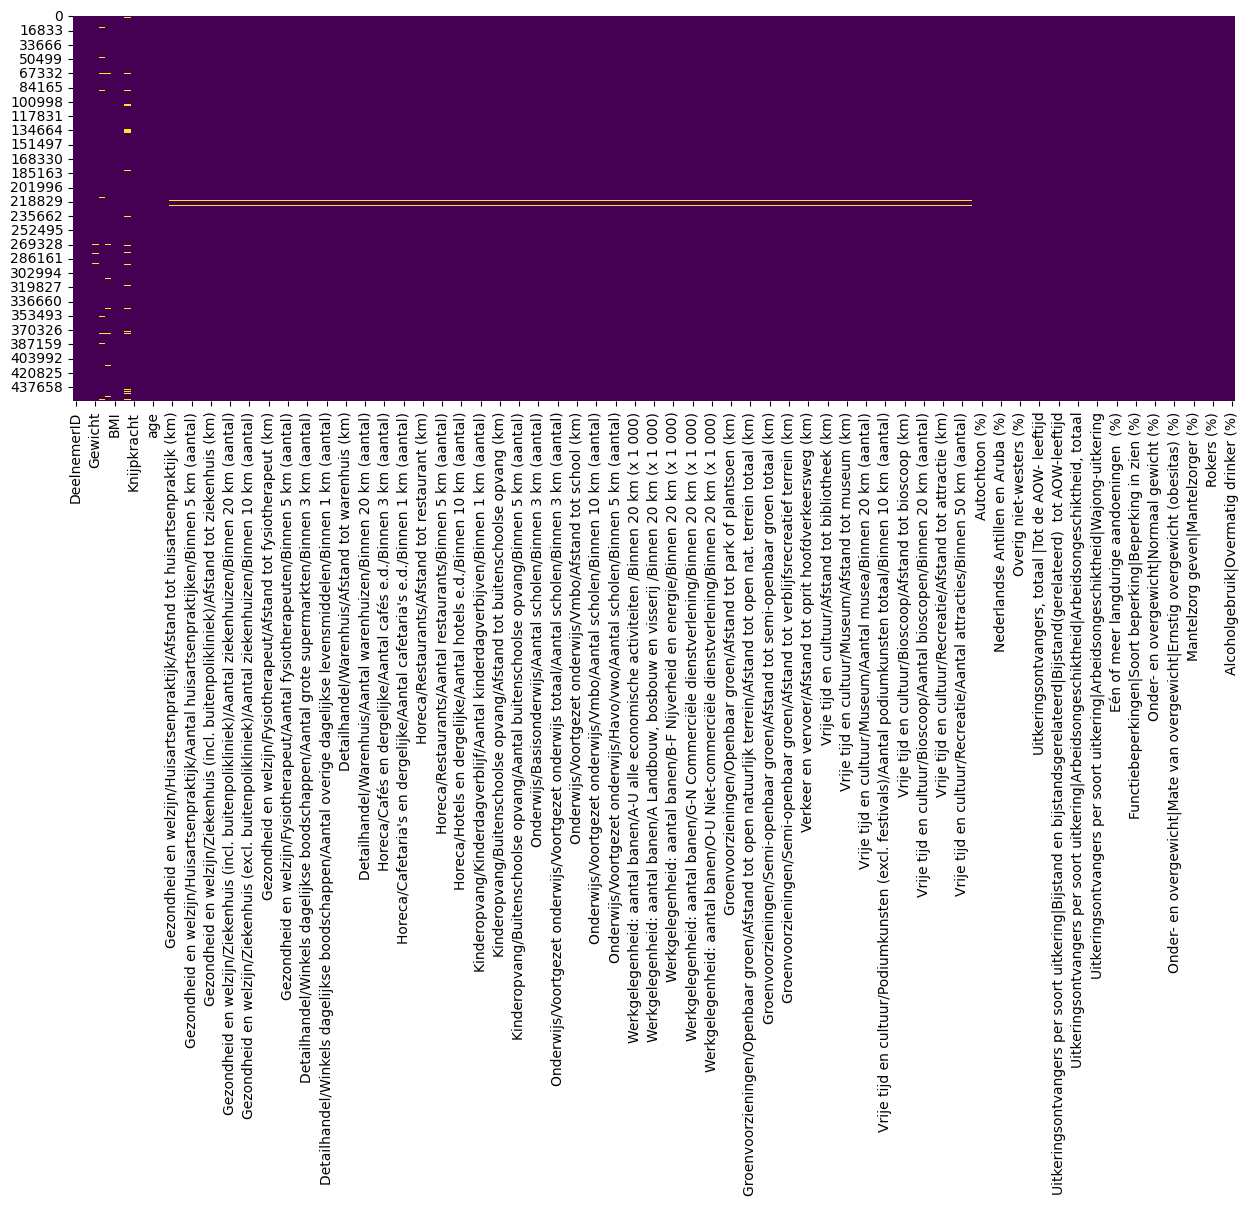

In [109]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_clean.isnull(),cbar=False,cmap='viridis')

In [110]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454464 entries, 0 to 454463
Columns: 181 entries, DeelnemerID to Alcoholgebruik|Overmatig drinker (%)
dtypes: Int64(1), datetime64[ns](1), float64(101), int64(22), object(56)
memory usage: 628.0+ MB


In [111]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df_clean.columns:
    try:
        print('{} : {}'.format(col,df_clean[col].unique()))
    except:
        print(col)

DeelnemerID : <IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   14,
 ...
 2003, 2009, 2405, 2480, 2481, 2482, 2483, 2484, 2485, 2486]
Length: 1732, dtype: Int64
Datum : <DatetimeArray>
['2018-03-30 00:00:00', '2018-06-18 00:00:00', '2019-01-25 00:00:00',
 '2018-07-02 00:00:00', '2018-11-29 00:00:00', '2018-07-11 00:00:00',
 '2018-10-22 00:00:00', '2018-04-03 00:00:00', '2018-07-09 00:00:00',
 '2018-04-04 00:00:00',
 ...
 '2022-08-29 00:00:00', '2022-11-03 00:00:00', '2022-09-09 00:00:00',
 '2022-12-16 00:00:00', '2022-09-26 00:00:00', '2022-09-12 00:00:00',
 '2022-11-02 00:00:00', '2022-12-02 00:00:00', '2022-12-12 00:00:00',
 '2023-01-18 00:00:00']
Length: 320, dtype: datetime64[ns]
Lengte : [159.   175.   170.   151.5  168.   169.   158.   162.   160.5  152.5
 152.   153.   155.   155.1  156.5  156.   177.   167.   167.5  185.5
 158.5  170.5  154.   160.4  166.5  163.   163.5  164.5  164.   165.
 181.5  186.5  174.   180.   180.5  174.7  174.5  176.   178.   165

In [112]:
for col in df_clean.columns:
    df_clean[col].replace({'?':np.nan},inplace=True)

null data vervangen

In [113]:

df_clean

,DeelnemerID,Datum,Lengte,Gewicht,6 MWT,TUG,BMI,Conditie,Lenigheid,Knijpkracht,...,Onder- en overgewicht|Mate van overgewicht|Ernstig overgewicht (obesitas) (%),Bewegen en sport|Voldoet aan beweegrichtlijn (%),Bewegen en sport|Wekelijks sporter (%),Mantelzorg geven|Mantelzorger (%),Mantelzorg geven|Zwaar belaste mantelzorgers (%),Mantelzorg geven|Uren mantelzorg per week (%),Rokers (%),Alcoholgebruik|Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik|Zware drinker (%),Alcoholgebruik|Overmatig drinker (%)
0,1,2018-03-30,159.0,97.6,500.0,6.36,38.606068,0.820291,31.50,15.0,...,"17,7","45,9",46,"16,7","12,6","10,4","18,3","47,3","6,5","5,3"
1,1,2018-03-30,159.0,97.6,500.0,6.36,38.606068,0.820291,31.50,15.0,...,"17,7","45,9",46,"16,7","12,6","10,4","18,3","47,3","6,5","5,3"
2,1,2018-03-30,159.0,97.6,500.0,6.36,38.606068,0.820291,31.50,15.0,...,"17,7","45,9",46,"16,7","12,6","10,4","18,3","47,3","6,5","5,3"
3,1,2018-03-30,159.0,97.6,500.0,6.36,38.606068,0.820291,31.50,15.0,...,"17,7","45,9",46,"16,7","12,6","10,4","18,3","47,3","6,5","5,3"
4,1,2018-03-30,159.0,97.6,500.0,6.36,38.606068,0.820291,31.50,15.0,...,"17,7","45,9",46,"16,7","12,6","10,4","18,3","47,3","6,5","5,3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454459,2486,2023-01-18,167.0,121.2,535.0,5.70,43.457994,0.771672,12.75,48.4,...,"20,6",40,"38,6","15,2","16,5","11,8","22,3","50,6","6,6","5,5"
454460,2486,2023-01-18,167.0,121.2,535.0,5.70,43.457994,0.771672,12.75,48.4,...,"20,6",40,"38,6","15,2","16,5","11,8","22,3","50,6","6,6","5,5"
454461,2486,2023-01-18,167.0,121.2,535.0,5.70,43.457994,0.771672,12.75,48.4,...,"20,6",40,"38,6","15,2","16,5","11,8","22,3","50,6","6,6","5,5"
454462,2486,2023-01-18,167.0,121.2,535.0,5.70,43.457994,0.771672,12.75,48.4,...,"20,6",40,"38,6","15,2","16,5","11,8","22,3","50,6","6,6","5,5"


In [114]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculate the correlation matrix
# corr_matrix = df_cbs_afstanden_volledig1.corr()

# # Create a heatmap of the correlation matrix
# plt.figure(figsize=(60, 60))  # Set the figure size
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# # Add plot labels
# plt.title('Correlation Matrix')
# plt.xlabel('Features')
# plt.ylabel('Features')

# # Show the plot
# plt.show()

In [115]:
df_clean.dtypes

DeelnemerID                                                         Int64
Datum                                                      datetime64[ns]
Lengte                                                            float64
Gewicht                                                           float64
6 MWT                                                             float64
                                                                ...      
Mantelzorg geven|Uren mantelzorg per week (%)                      object
Rokers (%)                                                         object
Alcoholgebruik|Voldoet aan richtlijn alcoholgebruik (%)            object
Alcoholgebruik|Zware drinker (%)                                   object
Alcoholgebruik|Overmatig drinker (%)                               object
Length: 181, dtype: object

In [116]:
# Deze code kan wellicth later weg maar even laten staan

# rename columns for merging
#df_cbs_afstanden.rename(columns={"Regio's": 'Gemeentenaam'}, inplace=True)

# merge df_cbs_gemeentecodes & df_cbs_afstanden
#df_cbs_afstanden_volledig = pd.merge(df_cbs_afstanden, df_cbs_gemeentecodes, on='Gemeentenaam')

#df_cbs_afstanden_volledig.drop(columns={'Gemeentecode', 'Provinciecode', 'ProvinciecodePV'}, inplace=True)

#stringstokeep = ['Beek', 'Beekdaelen', 'Breda', 'Echt-Susteren', 'Heerlen', 'Kerkrade', 
#                 'Maasgouw', 'Roerdalen','Roermond', 'Sittard-Geleen', 'Stein', 'Weert']

#condition = df_cbs_afstanden_volledig['Gemeentenaam'].str.contains('|'.join(stringstokeep))

#df_cbs_afstanden_volledig = df_cbs_afstanden_volledig[condition]

#df_cbs_afstanden_volledig.replace('       .', pd.NA, inplace=True)

#df_cbs_afstanden_volledig.dropna(axis=1, how='all', inplace=True)

# for some reason resetting the index makes a new column named index, so this one is also dropped
#df_cbs_afstanden_volledig.reset_index(inplace=True)
#df_cbs_afstanden_volledig.drop(columns={'index'},inplace=True)

# delete df_cbs_gemeentecodes and df_cbs_afstanden for minimalizing the ram usage
#del(df_cbs_gemeentecodes, df_cbs_afstanden, condition, stringstokeep)

In [120]:
#df_clean.drop(columns=['Datum'], inplace=True)
#df_clean = pd.get_dummies(df_clean, drop_first=True)

#df_clean.dropna(inplace=True)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame called 'df'

# Instantiate the t-SNE object
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE dimensionality reduction on your DataFrame
df_tsne = tsne.fit_transform(df_clean)

# Plot the results
plt.scatter(df_tsne[:, 0], df_tsne[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()